**Prática de Segmentação de imagens**

In [2]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

In [3]:
def plot_histograma(image, title):
    # Calcular o histograma da imagem
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    
    # Plotar o histograma
    plt.figure(figsize=(10, 5))
    plt.plot(hist, color='black')
    plt.title(title)
    plt.xlabel('Valor do Pixel')
    plt.ylabel('Número de Pixels')
    plt.xlim(0, 255)
    plt.grid(True)
    plt.show()

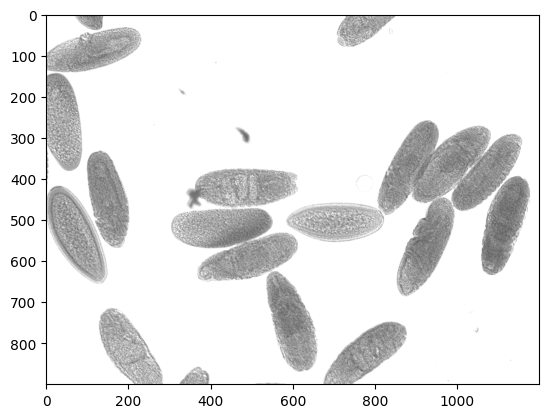

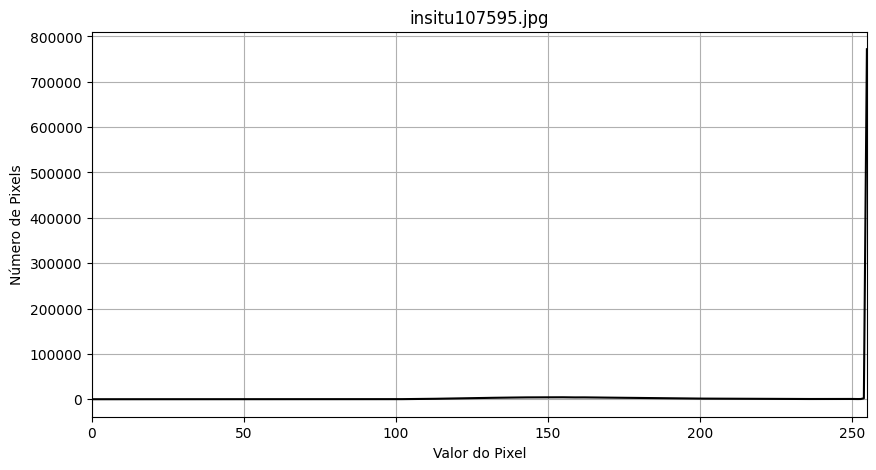

In [4]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)


plot_histograma(img1, "insitu107595.jpg")

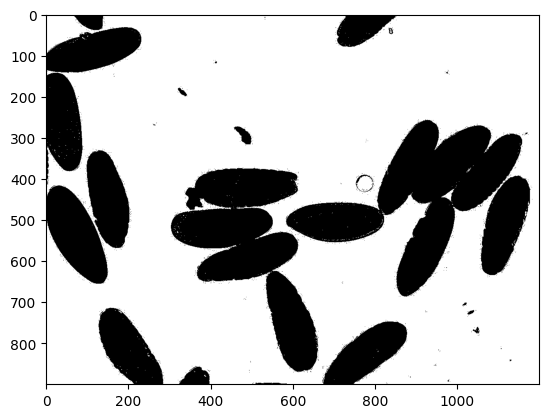

In [5]:
_, imagem_binaria = cv2.threshold(img1, 254, 1, cv2.THRESH_BINARY)

plt.imshow(imagem_binaria, cmap='gray', vmin=0, vmax=1)


2)	Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

In [19]:
def treshold_adaptativo(img):
    limiar_inicial = int(np.mean(img))
    limiar_atual = limiar_inicial
    variacao_limiar = -1

    while(variacao_limiar != 0):
        grupo_1 = [elemento for linha in img for elemento in linha if elemento < limiar_atual]
        grupo_2 = [elemento for linha in img for elemento in linha if elemento >= limiar_atual]

        media_grupo_1 = np.mean(grupo_1)
        media_grupo_2 = np.mean(grupo_2)

        novo_limiar = (media_grupo_1 + media_grupo_2) // 2

        variacao_limiar = limiar_atual - novo_limiar

        limiar_atual = novo_limiar

    _, imagem_binaria = cv2.threshold(img, limiar_atual, 1, cv2.THRESH_BINARY)

    return imagem_binaria

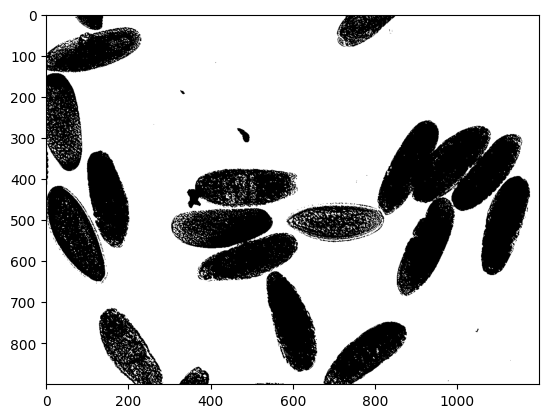

In [20]:
# SEGMENTAÇÃO SEM SUAVIZAÇÃO

img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

imagem_binaria = treshold_adaptativo(img1)

plt.imshow(imagem_binaria, cmap='gray', vmin=0, vmax=1)

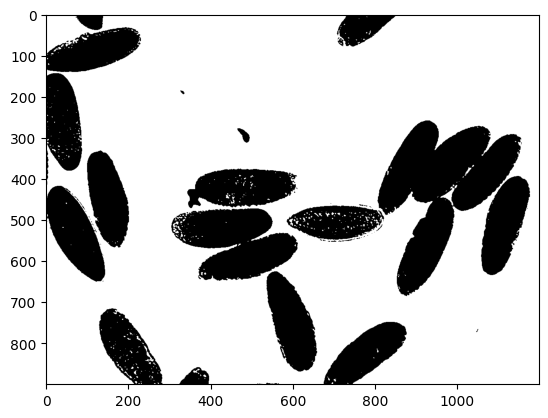

In [21]:
# SEGMENTAÇÃO COM SUAVIZAÇÃO

img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

blur = cv2.GaussianBlur(img1, (5, 5), 0)

imagem_binaria = treshold_adaptativo(blur)

plt.imshow(imagem_binaria, cmap='gray', vmin=0, vmax=1)

3) Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes (Exemplo: https://en.wikipedia.org/wiki/File:Otsu%27s_Method_Visualization.gif)

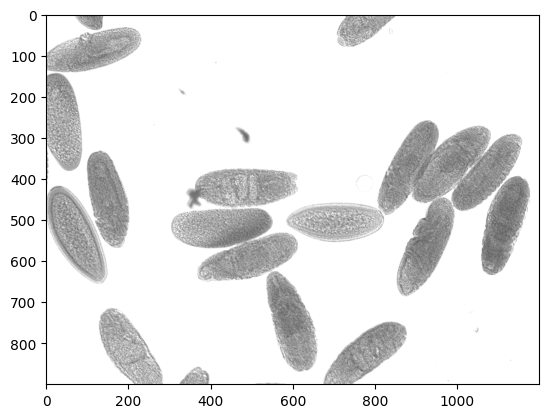

In [9]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

In [11]:
# 4)	Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)

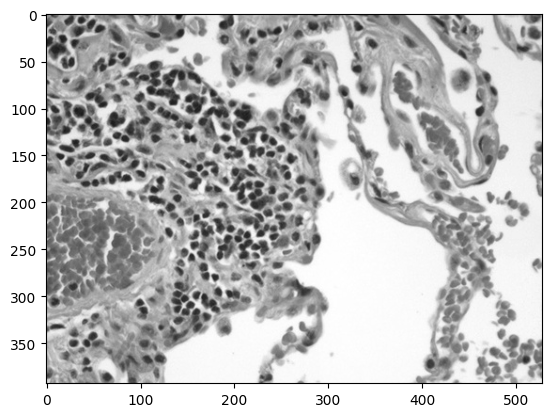

In [12]:
img1 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);